In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

In [2]:
df = pd.read_csv('./data/train.csv')
df.head(7)
# df.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


## Data Exploration

In [3]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
summary_stats.head(5)

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0


In [5]:
categorical_features = df.select_dtypes(include=[object])
cat_summary_objects = categorical_features.describe().T
cat_summary_objects.head(5)

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311


In [6]:
null_values  = df.isnull().sum()
null_values

missing_percentages = (null_values/len(df))*100
missing_percentages[30:50]

BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinSF1      0.000000
BsmtFinType2    2.602740
BsmtFinSF2      0.000000
BsmtUnfSF       0.000000
TotalBsmtSF     0.000000
Heating         0.000000
HeatingQC       0.000000
CentralAir      0.000000
Electrical      0.068493
1stFlrSF        0.000000
2ndFlrSF        0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BsmtHalfBath    0.000000
FullBath        0.000000
dtype: float64

In [7]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
import scipy.stats as stats

#Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df['SalePrice'])
mu, sigma 

#Create a histogram of the SalePrice column
hist_data = go.Histogram(x=df['SalePrice'], nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density', marker=dict(color='purple'))

# Calculate the normal distribution based on fiited parameters
x_norm = np.linspace(df['SalePrice'].min(),df['SalePrice'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Overlay

norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

fig = go.Figure(data=[hist_data, norm_data])


fig.update_layout(
    title="SalePrice Distribution",
    xaxis_title="SalePrice",
    yaxis_title = "Density",
    legend_title_text="Fitted Normal Distribution",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)


In [10]:
qq_data = stats.probplot(df['SalePrice'], dist="norm")
qq_fig = px.scatter(x=qq_data[0][0], y=qq_data[0][1],labels={'x': 'Theoretical Quantiles', 'y': 'Ordered Values'}, color_discrete_sequence=["purple"])
qq_fig.update_layout(
    title="Q-Q Plot",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
    )

# Calculate the best fitting line
# y=ax + b
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])

line_x = np.array(qq_data[0][0])
line_y =  slope * line_x + intercept

line_data = go.Scatter(x=line_x, y=line_y, mode="lines", name="Normal Line", line=dict(color="green"))

# Update Q-Q Plot

qq_fig.add_trace(line_data)
fig.show()
qq_fig.show()
qq_data

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

In [11]:
dwelling_types = df['BldgType'].value_counts()
dwelling_prices = df.groupby('BldgType')['SalePrice'].min()

# Format labels for the second graph
formatted_dwelling_prices = ['$' + f'{value:,.2f}' for value in dwelling_prices.values]
formatted_dwelling_prices 

# Create bar charts
fig1 = go.Figure(data=[go.Bar(
    x=dwelling_types.index,
    y=dwelling_types.values,
    marker_color='rgb(76, 175, 80)',
    text=dwelling_types.values,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig1.update_layout(
    title='Distribution of Building Types',
    xaxis_title='Building Type',
    yaxis_title='Count',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white')
)

fig2 = go.Figure(data=[go.Bar(
    x=dwelling_prices.index,
    y=dwelling_prices.values,
    marker_color='rgb(156, 39, 176)',
    text=formatted_dwelling_prices,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig2.update_layout(
    title='Average Sale Price by Building Type',
    xaxis_title='Building Type',
    yaxis_title='Price',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white')
)

# Show the figures
fig1.show()
fig2.show()



In [12]:
df['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [13]:
# AV zoning Price


zoning_prices = df.groupby('MSZoning')['SalePrice'].sum()

zoning_prices_agg = df.groupby('MSZoning')['MSZoning'].agg('count')

combined_df = pd.concat([zoning_prices, zoning_prices_agg], axis=1)
combined_df["Av_SalePrice"] = combined_df['SalePrice']/combined_df['MSZoning']
combined_df



,SalePrice,MSZoning,Av_SalePrice
MSZoning,,,
C (all),745280,10,74528.000000
FV,13910914,65,214014.061538
RH,2104934,16,131558.375000
RL,219846749,1151,191004.994787
RM,27537069,218,126316.830275


In [17]:
# Zoning impact in saleprice  -- TODO ADD COLORS

# fig3 = px.bar(x=combined_df.index, y=combined_df['Av_SalePrice'], title='Average Sale Price by Zoning', color_continuous_scale='greens')
# fig3.show()

fig4 = go.Figure(data=[go.Bar(
    x=combined_df.index,
    y=combined_df['Av_SalePrice'],
    marker_color='rgb(156, 39, 176)',
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1))])

fig4.update_layout(
    title='Average Sale Price by Zoning',
    xaxis_title='MsZoning',
    yaxis_title='Av Price',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white'))


# panw askisi

In [ ]:
street_prices = df.groupby('Street')['SalePrice'].mean()
alley_prices = df.groupby('Alley')['SalePrice'].mean()

colors_street = np.where(street_prices.index == "Pave", 'purple', 'green')
fig5 = px.bar(x=street_prices.index, y=street_prices.values, title="Average Sale Price by Street Type",
              template='plotly_dark', text=street_prices.values,color = colors_street, color_discrete_sequence=['purple', 'green'])

fig5.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig5.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig5.update_xaxes(title='Street Type')
fig5.update_layout(showlegend=False)




# alley_prices

In [18]:
# TODO Make the same for alley_prices
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [21]:
alley_prices = df.groupby('Alley')['SalePrice'].mean()
street_prices = df.groupby('Street')['SalePrice'].mean()


colors_street = np.where(alley_prices.index == "Pave", 'blue', 'yellow')
fig5 = px.bar(x=alley_prices.index, y=alley_prices.values, title="Average Sale Price by Alley Type",
              template='plotly_dark', text=street_prices.values,color = colors_street, color_discrete_sequence=['blue', 'yellow'])

fig5.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig5.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig5.update_xaxes(title='Alley Type')
fig5.update_layout(showlegend=False)

In [ ]:
#  4. Average sale price by property shape
# Colors for all categories of your column
colors = px.colors.qualitative.Plotly

shape_prices = df.groupby('LotShape')['SalePrice'].mean()
# Shape Prices
fig7 = px.bar(x=shape_prices.index, y=shape_prices.values, title='Average Sale Price by Property Shape',
              template='plotly_dark', text=shape_prices.values)

fig7.update_traces(marker_color=colors, texttemplate='$%{text:,.0f}', textposition='outside')
fig7.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig7.update_xaxes(title='Property Shape')
fig7.update_layout(showlegend=False)






In [ ]:
# TODO countour_prices
contour_prices = df.groupby('LandContour')['SalePrice'].mean()
fig8 = px.bar(x=shape_prices.index, y=shape_prices.values, title='Average Sale Price by LandContour',
              template='plotly_dark', text=contour_prices.values)

fig8.update_traces(marker_color=colors, texttemplate='$%{text:,.0f}', textposition='outside')
fig8.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig8.update_xaxes(title='Contour Prices')
fig8.update_layout(showlegend=False)


In [ ]:
age_df = pd.DataFrame([df['YearBuilt'], df['YrSold']])
age_df

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
YearBuilt,2003,1976,2001,1915,2000,1993,2004,1973,1931,1939,...,1974,2008,2005,2006,2004,1999,1978,1941,1950,1965
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,...,2009,2009,2006,2006,2009,2007,2010,2010,2010,2008


In [ ]:
# 5. Calculate Property Age

age_df = pd.DataFrame([df['YearBuilt'], df['YrSold']])
age_df

df['PropertyAge'] = df['YrSold'] - df['YearBuilt']

df['PropertyAge']


# Calculate Correlation between Property Age and Sale Price

age_price_corr = df['PropertyAge'].corr(df['SalePrice'])



# Create a scatter plot to visualize the relationship between Property Age and Sale Price
fig9 = px.scatter(df, x='PropertyAge', y='SalePrice', title='Property Age vs Sale Price',
                        color='PropertyAge', color_continuous_scale=px.colors.sequential.Purp)


fig9.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))

fig9.show()



<Axes: >

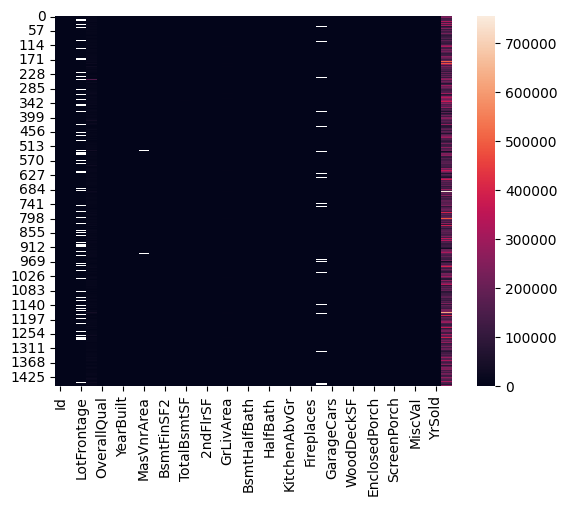

In [28]:
# TODO  --- 6. Calculate Correlation between Living Area and Sale Price
df['GrLivArea'].unique()

LivArea_corr = df['GrLivArea'].corr(df['SalePrice'])

# Create a scatter plot to visualize the relationship between Property Age and Sale Price
fig9 = px.scatter(df, x='GrLivArea', y='SalePrice', title='Living Area vs Sale Price',
                        color='GrLivArea', color_continuous_scale=px.colors.sequential.Purp)

fig9.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))

fig9.show()

# import seaborn as sb
# numerical_features = df.select_dtypes(include=[np.number])
# sb.heatmap(df.select_dtypes(include=[np.number]))




In [29]:
# 7. Box plot of price over the years
yearly_avg_sale_price = df.groupby('YrSold')['SalePrice'].mean()

# fig13 = px.box(df, x='YrSold', y='SalePrice', title='Sale Price Trends Over the Years',
#                points=False, color_discrete_sequence=['green'])
# fig13.show()
# for year, avg_price in yearly_avg_sale_price.items():
yearly_avg_sale_price
# fig13.add_annotation()

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

## Create Data Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numerical_transfomer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# 0->1000  0.5-> 30000 1->60000  scaler

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])


# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


numerical_columns = numerical_columns.drop('SalePrice')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transfomer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns),
    ], remainder='passthrough'
)

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

X = df.drop('SalePrice',axis=1)
y = np.log(df['SalePrice'])
X_preprocessed = pipeline.fit_transform(X)


C:\Users\xrist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



array([[-1.73086488,  0.07337496, -0.22937175, ...,  0.        ,
         1.        ,  0.        ],
       [-1.7284922 , -0.87256276,  0.4519361 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.72611953,  0.07337496, -0.09311018, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.72611953,  0.30985939, -0.18395123, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.7284922 , -0.87256276, -0.09311018, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.73086488, -0.87256276,  0.22483348, ...,  0.        ,
         1.        ,  0.        ]])